### NLP Basics

#### Use Case: Predict the type of query recieved from a customer when interacting with an AI-based Chatbot. 

To achieve the above objective, we will break down everything into the following steps inorder to understand the basic building blocks of Natural Language Processing:

0.  Understand the Data.
1.  Tokenization
2.  Bigrams, Trigrams and ngrams
3.  Stop-Word removal
4.  Stemming
5.  Lemmitization  
6.  POS tags and NER
7.  Syntax Trees
8.  Sentence Structure using Context Free Grammer (CFG's)
9.  Chunking and Chinking Techniques.
10. Quick recall of basic mechanisms of Machine Learning.
11. Bag of Words
12. Count Vectorization
13. TF-IDF
14. Overview of Machine Learning - Supervised Learning, Unsupervised Learning
15. Text Classification using SL algorithms.

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SiyaPransh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SiyaPransh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SiyaPransh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SiyaPransh/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
#   0.  Understand the data

df = pd.read_csv('expanded_customer_support_queries.csv')
print("\n",df.head(5),"\n","========================") # display the top 3 records.
print("\n",df.info(),"\n","========================") # Basic dataframe info
print("\n",df.describe(),"\n","========================") # Basic dataframe description
print("\n",df['Category'].unique(),"\n","========================") # Printing the uniques values in col Category


                                    Customer_Query           Category
0                    How can I reset my password?  Technical Support
1  My order hasn't arrived yet, what should I do?        Order Issue
2                I need a refund for my purchase.     Refund Request
3            Do you offer international shipping?    General Inquiry
4              The product I received is damaged.        Order Issue 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_Query  61 non-null     object
 1   Category        61 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB

 None 

                       Customer_Query         Category
count                             61               61
unique                            61                4
top     How can I reset my password?  General Inquiry
freq                               1   

Within our data, we have 2 cols called **Customer_Query** and **Category** and a total **61 records** <br>
Also, from results for describe fn, we see there are 4 unique values in **Category** col.<br>
These unique values are *'Technical Support' 'Order Issue' 'Refund Request' 'General Inquiry'* as displayed using the unique fn above.

#### Thus, clarifing our objective:

*Anytime a customer inputs a query like **What is happening to my delivery**, our bot should be above to categorize the query to be as **Oder Issue***

In [4]:
from nltk.tokenize import word_tokenize
'''
nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)
Returns a tokenized copy of text, using NLTK’s recommended word tokenizer (currently an improved TreebankWordTokenizer along 
with PunktSentenceTokenizer for the specified language).
'''

text = "This is a sample text. At the end we will be using the data from the Customer_Query col."
text = text.lower()
tokens = word_tokenize(text)
print(tokens)


['this', 'is', 'a', 'sample', 'text', '.', 'at', 'the', 'end', 'we', 'will', 'be', 'using', 'the', 'data', 'from', 'the', 'customer_query', 'col', '.']


In [5]:
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
'''
Lemmatize using WordNet’s built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet.
'''
wnl = WordNetLemmatizer()
tokens = [wnl.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
print(tokens)

['sample', 'text', '.', 'end', 'using', 'data', 'customer_query', 'col', '.']


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['Processed_Query'] = df['Customer_Query'].apply(preprocess_text)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Query'])
y = df['Category']

# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training using Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

# Function to predict category of a new query
def predict_category(query):
    processed_query = preprocess_text(query)
    query_vector = vectorizer.transform([processed_query])
    prediction = model.predict(query_vector)[0]
    return prediction

# Example query
example_query = "Where is my order?"
predicted_category = predict_category(example_query)
print(f'Predicted Category: {predicted_category}')


Accuracy: 0.54
Classification Report:
                    precision    recall  f1-score   support

  General Inquiry       0.54      1.00      0.70         7
      Order Issue       0.00      0.00      0.00         3
   Refund Request       0.00      0.00      0.00         1
Technical Support       0.00      0.00      0.00         2

         accuracy                           0.54        13
        macro avg       0.13      0.25      0.17        13
     weighted avg       0.29      0.54      0.38        13

Predicted Category: General Inquiry


C:\Users\SiyaPransh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SiyaPransh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SiyaPransh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
import nltk
print(dir(nltk.corpus))
from nltk.corpus import twitter_samples
print (nltk.corpus.twitter_samples)
from nltk.corpus import swadesh
nltk.download('gutenberg')
from nltk.corpus import gutenberg
print (nltk.corpus.gutenberg)
print (gutenberg.fileids())

['AlignedCorpusReader', 'AlpinoCorpusReader', 'BCP47CorpusReader', 'BNCCorpusReader', 'BracketParseCorpusReader', 'CHILDESCorpusReader', 'CMUDictCorpusReader', 'CategorizedBracketParseCorpusReader', 'CategorizedCorpusReader', 'CategorizedPlaintextCorpusReader', 'CategorizedSentencesCorpusReader', 'CategorizedTaggedCorpusReader', 'ChasenCorpusReader', 'ChunkedCorpusReader', 'ComparativeSentencesCorpusReader', 'ConllChunkCorpusReader', 'ConllCorpusReader', 'CorpusReader', 'CrubadanCorpusReader', 'DependencyCorpusReader', 'EuroparlCorpusReader', 'FramenetCorpusReader', 'IEERCorpusReader', 'IPIPANCorpusReader', 'IndianCorpusReader', 'KNBCorpusReader', 'LazyCorpusLoader', 'LinThesaurusCorpusReader', 'MTECorpusReader', 'MWAPPDBCorpusReader', 'MacMorphoCorpusReader', 'NKJPCorpusReader', 'NPSChatCorpusReader', 'NombankCorpusReader', 'NonbreakingPrefixesCorpusReader', 'OpinionLexiconCorpusReader', 'PPAttachmentCorpusReader', 'PanLexLiteCorpusReader', 'PanlexSwadeshCorpusReader', 'Pl196xCorpusRe

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\SiyaPransh/nltk_data...


<PlaintextCorpusReader in '.../corpora/gutenberg' (not loaded yet)>
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data]   Unzipping corpora\gutenberg.zip.


In [17]:
print(gutenberg.words('shakespeare-macbeth.txt'))

['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...]


In [18]:
f = open("Macbeth.txt", "w")

TypeError: write() argument must be str, not StreamBackedCorpusView

In [19]:
f.write(str(gutenberg.words('shakespeare-macbeth.txt')))

52

In [21]:
f.close()

In [16]:
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Create a set of stop words 
stop_words = set(stopwords.words('english')) 
example_sent = str(gutenberg.words('shakespeare-macbeth.txt'))
word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(word_tokens)
print(filtered_sentence)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SiyaPransh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'gutenberg' is not defined

In [36]:
nltk.download('names') 

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\SiyaPransh/nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


True

In [10]:
from nltk.corpus import names
for fileid in names.fileids():
    n_words = len(names.words(fileid))
    print(n_words)
print(names.words('male.txt'))

5001
2943
['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim', 'Abdullah', 'Abe', 'Abel', 'Abelard', 'Abner', 'Abraham', 'Abram', 'Ace', 'Adair', 'Adam', 'Adams', 'Addie', 'Adger', 'Aditya', 'Adlai', 'Adnan', 'Adolf', 'Adolfo', 'Adolph', 'Adolphe', 'Adolpho', 'Adolphus', 'Adrian', 'Adrick', 'Adrien', 'Agamemnon', 'Aguinaldo', 'Aguste', 'Agustin', 'Aharon', 'Ahmad', 'Ahmed', 'Ahmet', 'Ajai', 'Ajay', 'Al', 'Alaa', 'Alain', 'Alan', 'Alasdair', 'Alastair', 'Albatros', 'Albert', 'Alberto', 'Albrecht', 'Alden', 'Aldis', 'Aldo', 'Aldric', 'Aldrich', 'Aldus', 'Aldwin', 'Alec', 'Aleck', 'Alejandro', 'Aleks', 'Aleksandrs', 'Alessandro', 'Alex', 'Alexander', 'Alexei', 'Alexis', 'Alf', 'Alfie', 'Alfonse', 'Alfonso', 'Alfonzo', 'Alford', 'Alfred', 'Alfredo', 'Algernon', 'Ali', 'Alic', 'Alister', 'Alix', 'Allah', 'Allan', 'Allen', 'Alley', 'Allie', 'Allin', 'Allyn', 'Alonso', 'Alonzo', 'Aloysius', 'Alphonse', 'Alphonso', 'Alston', 'Alton', 'Alvin', 'Alwin',

In [45]:
for fileid in names.fileids():
    n_chars = len(names.raw(fileid))
    print(n_chars)

35576
20293


In [14]:
from nltk.probability import FreqDist as fd
from nltk.tokenize import word_tokenize as wt
first_gen = names.words('male.txt')
first_gen = wt(str((first_gen)))
import string
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
first_gen_no_punct = []
first_gen_words = []
for i in first_gen:
    for j in list(string.punctuation):
        i = i.replace(j,'').lower()
    first_gen_no_punct.append(i)
for i in first_gen_no_punct:
    if i.isalpha():
        first_gen_words.append(i)
word_dict = dict(fd(first_gen_words).most_common())
fd(first_gen_words).most_common()
letters = []
for i in str(first_gen_words):
    if i.isalpha():
        letters.append(i)
fd(letters).most_common()

[('e', 1958),
 ('a', 1683),
 ('r', 1631),
 ('n', 1302),
 ('i', 1248),
 ('l', 1135),
 ('o', 1129),
 ('t', 857),
 ('s', 804),
 ('d', 757),
 ('h', 630),
 ('m', 566),
 ('c', 500),
 ('y', 492),
 ('u', 434),
 ('b', 388),
 ('g', 362),
 ('w', 259),
 ('k', 254),
 ('f', 239),
 ('p', 211),
 ('v', 204),
 ('j', 163),
 ('z', 79),
 ('x', 33),
 ('q', 22)]

C:\Users\SiyaPransh\AppData\Local\Temp\ipykernel_25304\4103198320.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.figure.show()


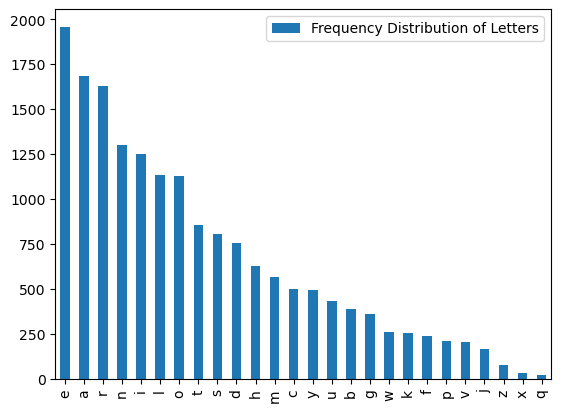

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
letter_dict = dict(fd(letters).most_common())
most_common_letters = pd.DataFrame(
    {"Frequency Distribution of Letters":  list(letter_dict.values())}, 
    index=list(letter_dict.keys()))
plt = most_common_letters.plot(kind="bar")
plt.figure.savefig('FrequencyOfNamesOfEachAlphabet.png')
plt.figure.show()